<a href="https://colab.research.google.com/github/Moxa13patel/Task-2-/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [8]:
df=pd.read_csv("/content/Titanic-Cleaned.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_scaled
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,-0.502445
1,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,-0.488854
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,0.420730
3,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,-0.486337
4,6,0,3,"Moran, Mr. James",1,28.0,0,0,330877,8.4583,NaN,1,-0.478116


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_scaled
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,447.883008,0.334262,2.512535,0.681058,28.079387,0.413649,0.317549,17.193204,1.611421,-0.302242
std,259.549777,0.472061,0.715818,0.466391,10.012369,0.855001,0.784792,13.244507,0.726646,0.266674
min,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,-0.648422
25%,220.250000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.889575,2.000000,-0.489568
50%,447.500000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,11.750000,2.000000,-0.411839
75%,673.500000,1.000000,3.000000,1.000000,32.875000,1.000000,0.000000,25.928150,2.000000,-0.126366
max,891.000000,1.000000,3.000000,1.000000,54.000000,5.000000,6.000000,61.379200,2.000000,0.587429


###ploting boxplot graph

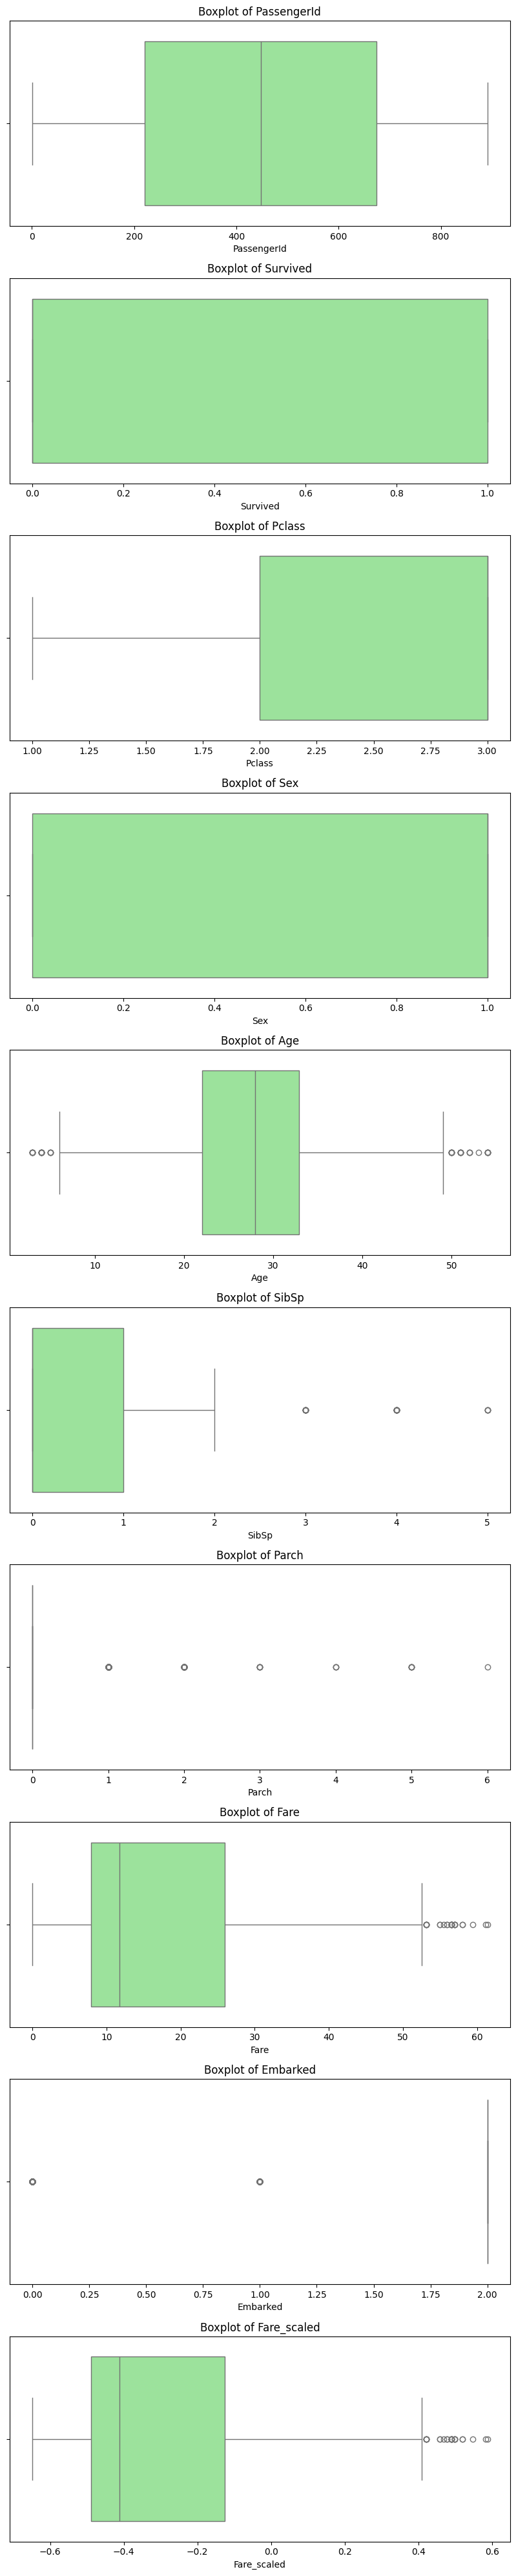

In [19]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(16, len(numeric_cols) * 4))

for i, col in enumerate(numeric_cols):
   plt.subplot(len(numeric_cols), 2, 2*i+2)
   sns.boxplot(x=df[col], color='lightgreen')
   plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

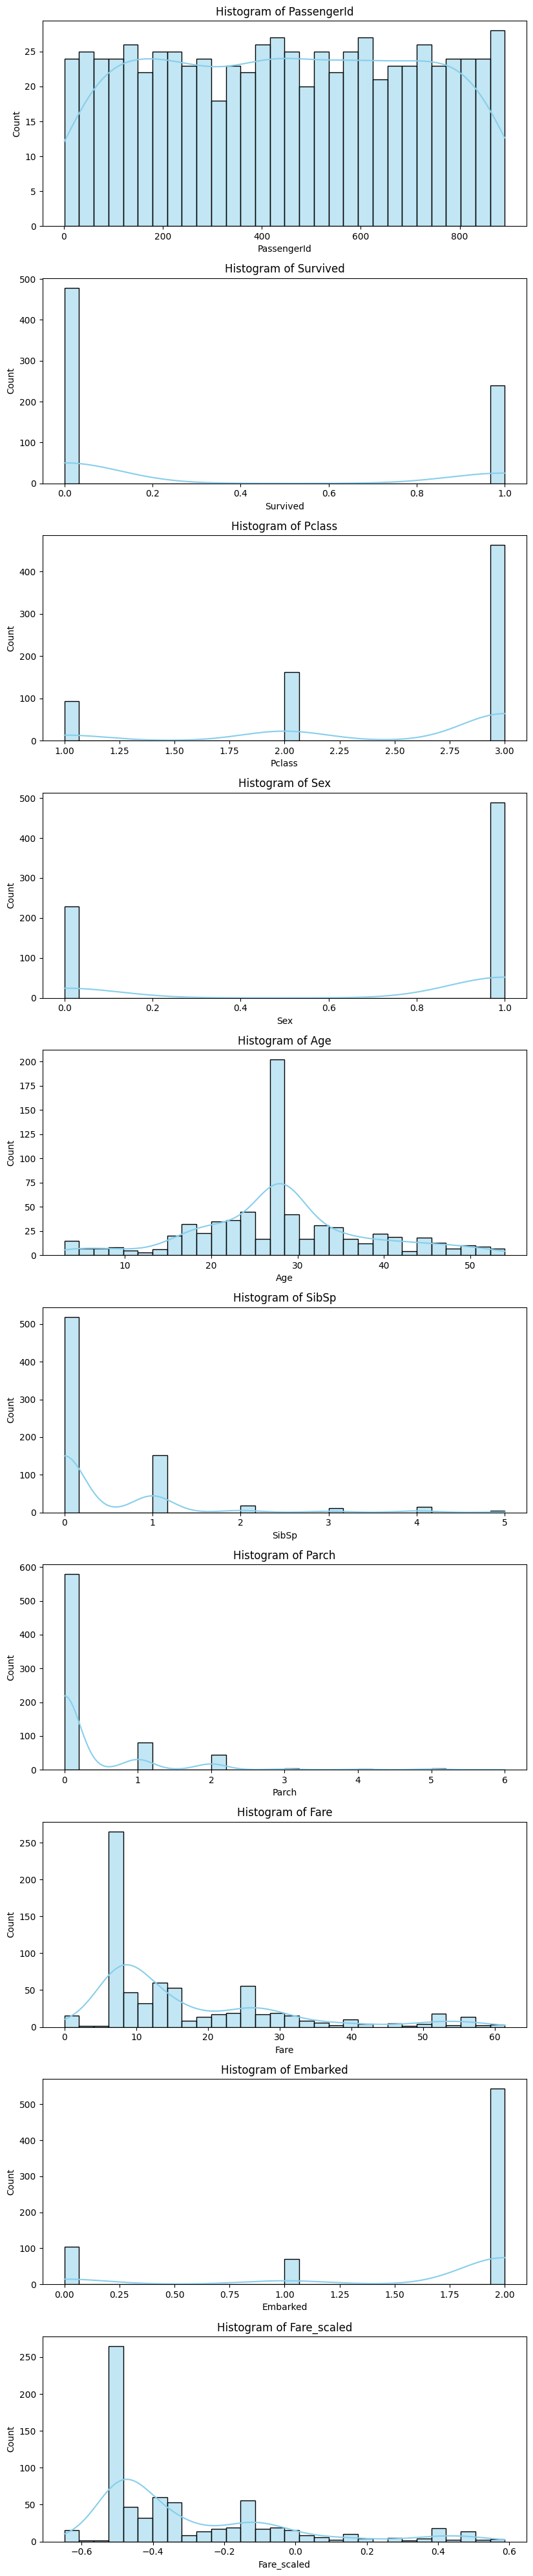

In [20]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(16, len(numeric_cols) * 4))

for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 2, 2*i+1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

###Correlation Heatmap (Numeric Features Only)

<Axes: >

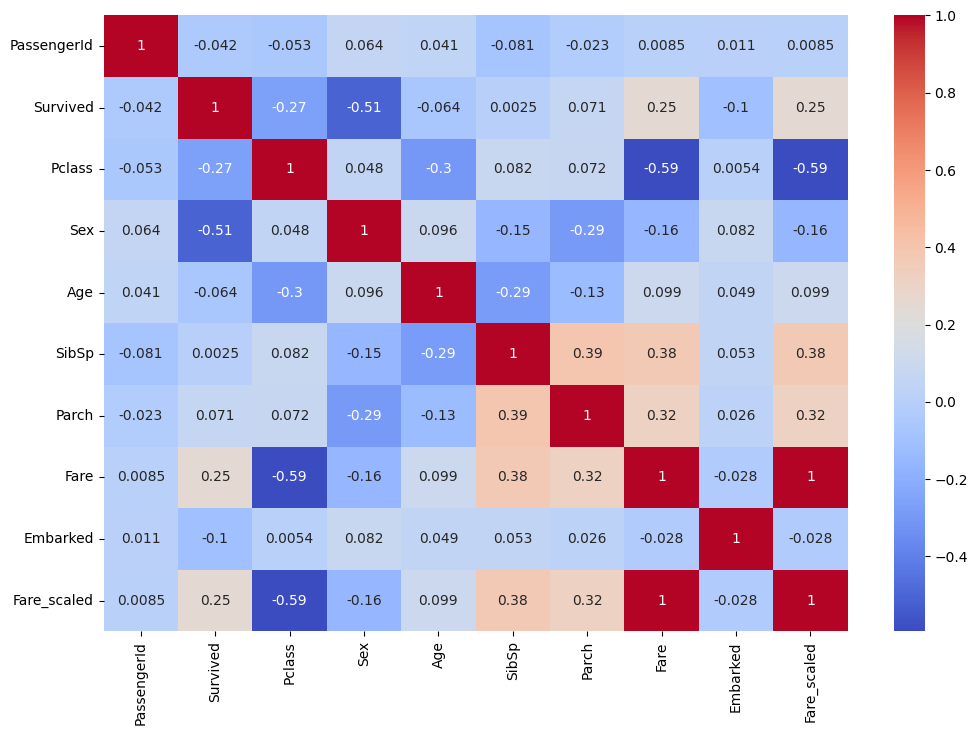

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True,cmap='coolwarm')


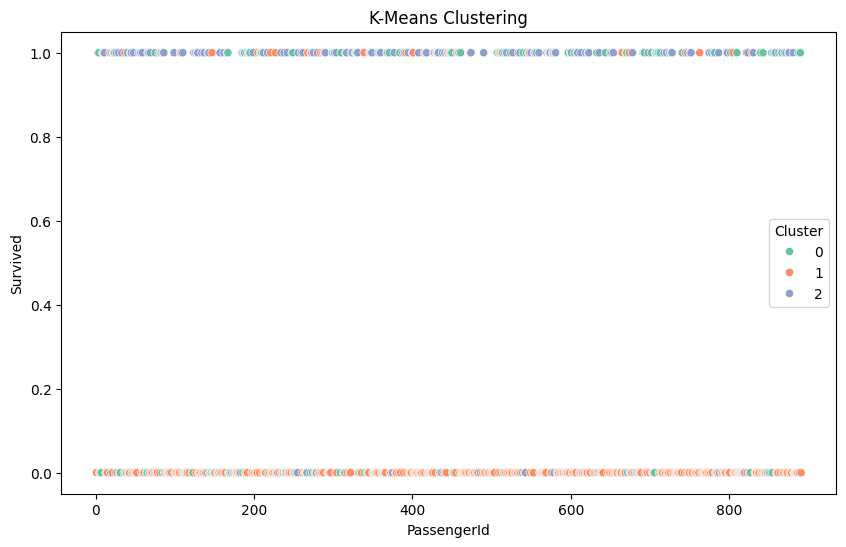

In [25]:

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_cols])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df[numeric_cols[0]], y=df[numeric_cols[1]], hue='Cluster', data=df, palette='Set2')
plt.title('K-Means Clustering')
plt.show()